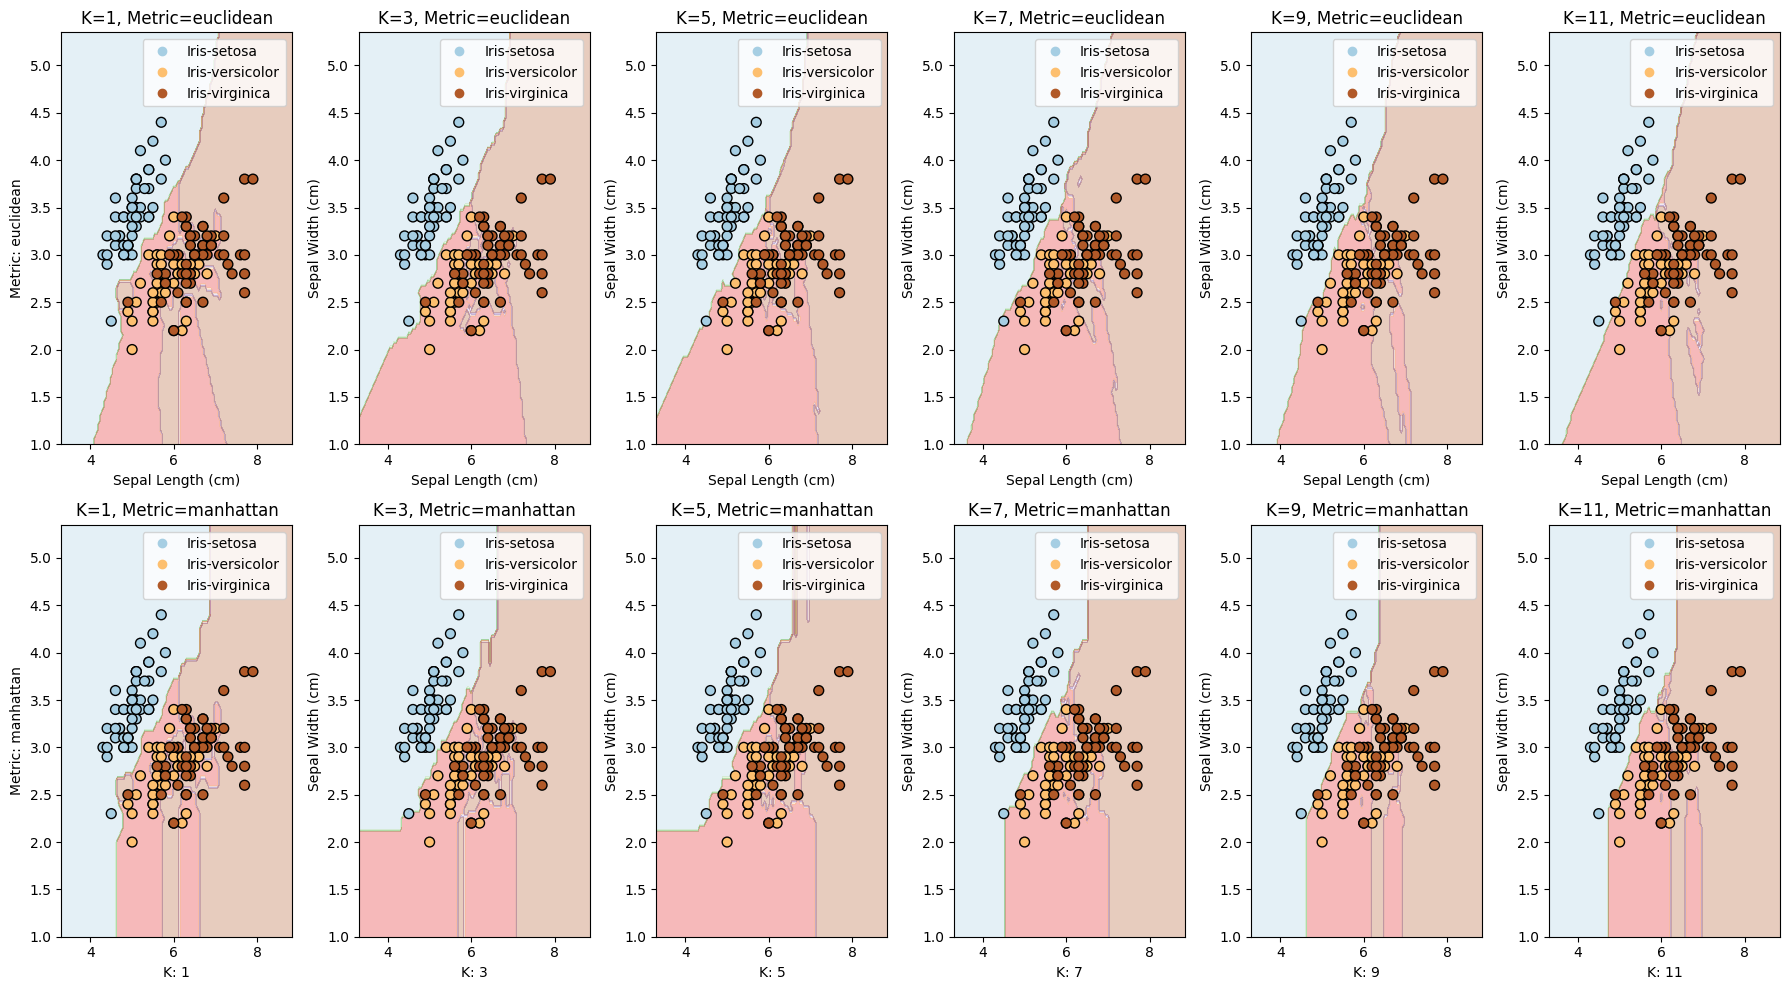

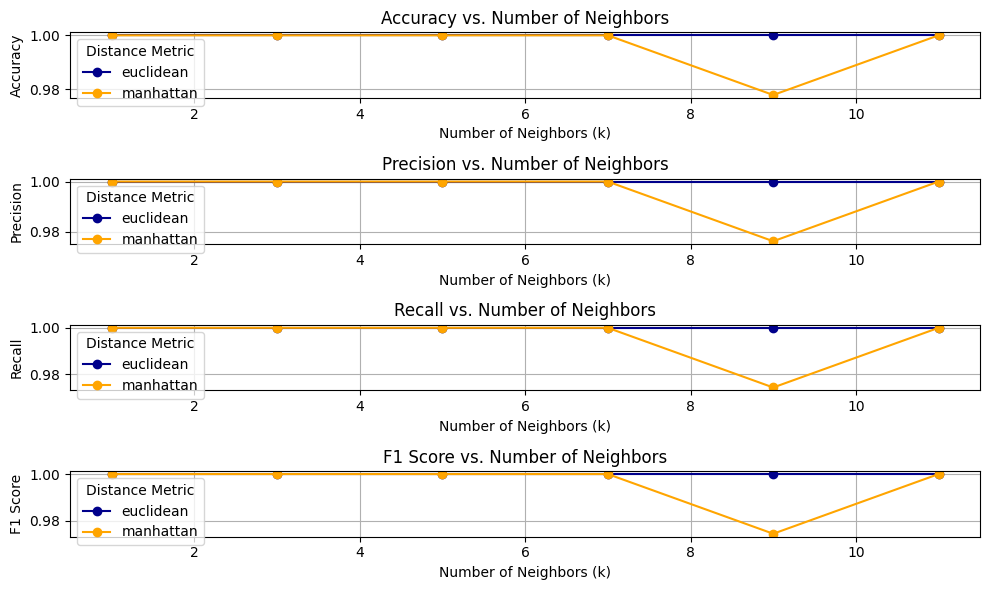

Performance Metrics for Each k and Distance Metric:
     k distance_metric  accuracy  precision    recall  f1_score
0    1       euclidean  1.000000    1.00000  1.000000  1.000000
1    1       manhattan  1.000000    1.00000  1.000000  1.000000
2    3       euclidean  1.000000    1.00000  1.000000  1.000000
3    3       manhattan  1.000000    1.00000  1.000000  1.000000
4    5       euclidean  1.000000    1.00000  1.000000  1.000000
5    5       manhattan  1.000000    1.00000  1.000000  1.000000
6    7       euclidean  1.000000    1.00000  1.000000  1.000000
7    7       manhattan  1.000000    1.00000  1.000000  1.000000
8    9       euclidean  1.000000    1.00000  1.000000  1.000000
9    9       manhattan  0.977778    0.97619  0.974359  0.974321
10  11       euclidean  1.000000    1.00000  1.000000  1.000000
11  11       manhattan  1.000000    1.00000  1.000000  1.000000


In [1]:
# Import necessary libraries
import pandas as pd  # Import pandas for data manipulation and analysis
import numpy as np  # Import numpy for numerical computations
import matplotlib.pyplot as plt  # Import matplotlib for plotting
from sklearn.model_selection import train_test_split  # Import for splitting data into training and testing sets
from sklearn.neighbors import KNeighborsClassifier  # Import KNN algorithm for classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  # Import evaluation metrics

# Load the Iris dataset from a CSV file
df = pd.read_csv('./Iris.csv')  # Read the CSV file into a DataFrame

# Extract feature columns and target column from the DataFrame
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values  # Features: Sepal Length, Sepal Width, Petal Length, Petal Width
y = df['Species'].factorize()[0]  # Target: Species, converted to numeric values

# Split the dataset into training and testing sets (INSTRUCTION #1: Split the dataset into training and testing sets.)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training, 30% testing

# List of k values (number of neighbors) and distance metrics to test in KNN
k_values = [1, 3, 5, 7, 9, 11]  # Number of neighbors to test
distance_metrics = ['euclidean', 'manhattan']  # Distance metrics to test

# Initialize a dictionary to store performance metrics for each combination of k and distance metric
results = {
    'k': [],  # Number of neighbors
    'distance_metric': [],  # Distance metric used
    'accuracy': [],  # Accuracy of the model
    'precision': [],  # Precision of the model
    'recall': [],  # Recall of the model
    'f1_score': []  # F1 Score of the model
}

# Evaluate model performance for each combination of k and distance metric (INSTRUCTION #2: Train multiple KNN classifiers with different values of k and distance metrics.)
for k in k_values:  # Iterate over each value of k
    for metric in distance_metrics:  # Iterate over each distance metric
        # Initialize and train the KNN classifier with the current k and distance metric
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)  # Create KNN classifier
        knn.fit(X_train, y_train)  # Train the classifier on the training data
        y_pred = knn.predict(X_test)  # Make predictions on the test data
        
        # Calculate performance metrics (INSTRUCTION #3: Evaluate the models using accuracy, precision, recall, and F1-score.)
        accuracy = accuracy_score(y_test, y_pred)  # Accuracy of the model
        precision = precision_score(y_test, y_pred, average='macro')  # Precision of the model
        recall = recall_score(y_test, y_pred, average='macro')  # Recall of the model
        f1 = f1_score(y_test, y_pred, average='macro')  # F1 Score of the model
        
        # Store performance metrics in the results dictionary
        results['k'].append(k)
        results['distance_metric'].append(metric)
        results['accuracy'].append(accuracy)
        results['precision'].append(precision)
        results['recall'].append(recall)
        results['f1_score'].append(f1)

# Function to plot decision boundaries for KNN (INSTRUCTION #4: Visualize the decision boundaries for different k values.)
def plot_decision_boundaries(X, y, k, metric, ax):
    # Initialize and train the KNN classifier with the specified k and distance metric
    knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
    knn.fit(X, y)
    
    # Define the range for plotting decision boundaries
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1  # X-axis limits
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1  # Y-axis limits
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))  # Create a grid for plotting

    # Predict the class for each point in the grid
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])  # Predict classes for each point in the grid
    Z = Z.reshape(xx.shape)  # Reshape predictions to match the grid shape
    
    # Plot decision boundaries using a contour plot
    cmap = plt.cm.Paired  # Colormap for plotting
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)  # Fill contour plot with predicted class
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k', cmap=cmap)  # Scatter plot of the data points
    
    # Set the title and axis labels for the plot
    ax.set_title(f'K={k}, Metric={metric}')
    ax.set_xlabel('Sepal Length (cm)')
    ax.set_ylabel('Sepal Width (cm)')
    
    # Add a legend if there are three unique classes
    if len(np.unique(y)) == 3:
        ax.legend(handles=scatter.legend_elements()[0], labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

# Prepare data for visualization by selecting only the first two features (for 2D plotting)
X_vis = X[:, :2]  # Use only Sepal Length and Sepal Width for 2D visualization
y_vis = y

# Create subplots for visualizing decision boundaries
fig, axes = plt.subplots(len(distance_metrics), len(k_values), figsize=(18, 10))  # Create subplots

# Iterate over each distance metric and k value to plot the decision boundaries (INSTRUCTION #4: Visualize the decision boundaries for different k values.)
for i, metric in enumerate(distance_metrics):  # Iterate over distance metrics
    for j, k in enumerate(k_values):  # Iterate over k values
        ax = axes[i, j]  # Select the appropriate subplot
        plot_decision_boundaries(X_vis, y_vis, k, metric, ax)  # Plot the decision boundaries
        if j == 0:
            ax.set_ylabel(f'Metric: {metric}')  # Label y-axis with distance metric
        if i == len(distance_metrics) - 1:
            ax.set_xlabel(f'K: {k}')  # Label x-axis with k value

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()  # Display the plots

# Convert the results dictionary into a pandas DataFrame for easier analysis and plotting
results_df = pd.DataFrame(results)  # Create DataFrame from results dictionary

# Create subplots for plotting performance metrics
fig, axes = plt.subplots(4, 1, figsize=(10, 6))  # 4 rows, 1 column for each metric

# Define custom colors for the distance metrics
colors = {'euclidean': 'darkblue', 'manhattan': 'orange'}  # Colors for distance metrics

# (INSTRUCTION #5: Plot performance metrics against different k values and distance metrics.)
# Plot Accuracy vs. Number of Neighbors
axes[0].set_title('Accuracy vs. Number of Neighbors')  # Title of the plot
for metric in distance_metrics:  # Iterate over distance metrics
    subset = results_df[results_df['distance_metric'] == metric]  # Filter results for the current metric
    axes[0].plot(subset['k'], subset['accuracy'], marker='o', label=metric, color=colors[metric])  # Plot accuracy
axes[0].set_xlabel('Number of Neighbors (k)')
axes[0].set_ylabel('Accuracy')
axes[0].legend(title='Distance Metric')
axes[0].grid(True)  # Add gridlines to the plot

# Plot Precision vs. Number of Neighbors
axes[1].set_title('Precision vs. Number of Neighbors')  # Title of the plot
for metric in distance_metrics:  # Iterate over distance metrics
    subset = results_df[results_df['distance_metric'] == metric]  # Filter results for the current metric
    axes[1].plot(subset['k'], subset['precision'], marker='o', label=metric, color=colors[metric])  # Plot precision
axes[1].set_xlabel('Number of Neighbors (k)')
axes[1].set_ylabel('Precision')
axes[1].legend(title='Distance Metric')
axes[1].grid(True)  # Add gridlines to the plot

# Plot Recall vs. Number of Neighbors
axes[2].set_title('Recall vs. Number of Neighbors')  # Title of the plot
for metric in distance_metrics:  # Iterate over distance metrics
    subset = results_df[results_df['distance_metric'] == metric]  # Filter results for the current metric
    axes[2].plot(subset['k'], subset['recall'], marker='o', label=metric, color=colors[metric])  # Plot recall
axes[2].set_xlabel('Number of Neighbors (k)')
axes[2].set_ylabel('Recall')
axes[2].legend(title='Distance Metric')
axes[2].grid(True)  # Add gridlines to the plot

# Plot F1 Score vs. Number of Neighbors
axes[3].set_title('F1 Score vs. Number of Neighbors')  # Title of the plot
for metric in distance_metrics:  # Iterate over distance metrics
    subset = results_df[results_df['distance_metric'] == metric]  # Filter results for the current metric
    axes[3].plot(subset['k'], subset['f1_score'], marker='o', label=metric, color=colors[metric])  # Plot F1 score
axes[3].set_xlabel('Number of Neighbors (k)')
axes[3].set_ylabel('F1 Score')
axes[3].legend(title='Distance Metric')
axes[3].grid(True)  # Add gridlines to the plot

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()  # Display the plots

# Print the DataFrame containing performance metrics for each k and distance metric combination
print("Performance Metrics for Each k and Distance Metric:")
print(results_df)  # Print the results DataFrame
